In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Loading the data

data = pd.read_csv(r"C:\Users\Shashi\Model Building\Neural Network\concrete.csv")

In [18]:
# Checking the head of data

data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [19]:
# Checking the duplicates

data.duplicated().sum()

25

In [20]:
data = data.drop_duplicates()

In [21]:
data.duplicated().sum()

0

In [22]:
# Checking the Missing Values

data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [23]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [24]:
# Standardization - Scaler Min = 0, MAx = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [25]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.403268,0.200455,0.277543,0.481432,0.187368,0.504002,0.448290,0.123233,0.410121
std,0.238229,0.239763,0.320879,0.170442,0.183850,0.225522,0.201557,0.175095,0.202875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.202511,0.000000,0.000000,0.357827,0.000000,0.380814,0.326894,0.016484,0.263984
50%,0.372146,0.055648,0.000000,0.510383,0.189441,0.485465,0.466633,0.074176,0.392052
75%,0.563927,0.396494,0.591204,0.567891,0.310559,0.668605,0.572504,0.151099,0.529961
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Spliting the data

X = data.drop('strength', axis = 1)
Y = data.strength

In [27]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176
...,...,...,...,...,...,...,...,...
1025,0.075342,0.000000,0.829585,0.464856,0.310559,0.465116,0.529353,0.074176
1026,0.980137,0.000000,0.000000,0.159744,0.875776,0.148547,0.751882,0.005495
1027,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176
1028,0.547945,0.105732,0.000000,0.848243,0.000000,0.380814,0.190667,0.739011


In [28]:
Y

0       0.343341
1       0.263859
2       0.334994
3       0.542170
4       0.198829
          ...   
1025    0.136539
1026    0.485486
1027    0.522611
1028    0.656908
1029    0.626386
Name: strength, Length: 1005, dtype: float64

In [95]:
# Spliting the data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [96]:
X.shape

(1005, 8)

In [97]:
Y.shape

(1005,)

In [98]:
len(X.columns)

8

In [107]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu',input_dim = 8))

# Adding the second hidden layer
#classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(x_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
54/54 [==============================] - 1s 9ms/step - loss: 0.0389 - accuracy: 0.0019 - val_loss: 0.0375 - val_accuracy: 0.0000e+00
Epoch 2/10
54/54 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.0019 - val_loss: 0.0325 - val_accuracy: 0.0000e+00
Epoch 3/10
54/54 [==============================] - 0s 5ms/step - loss: 0.0290 - accuracy: 0.0019 - val_loss: 0.0291 - val_accuracy: 0.0000e+00
Epoch 4/10
54/54 [==============================] - 0s 5ms/step - loss: 0.0263 - accuracy: 0.0019 - val_loss: 0.0264 - val_accuracy: 0.0000e+00
Epoch 5/10
54/54 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.0019 - val_loss: 0.0242 - val_accuracy: 0.0000e+00
Epoch 6/10
54/54 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.0019 - val_loss: 0.0223 - val_accuracy: 0.0000e+00
Epoch 7/10
54/54 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.0019 - val_loss: 0.0209 - val_accuracy: 0.0

In [108]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


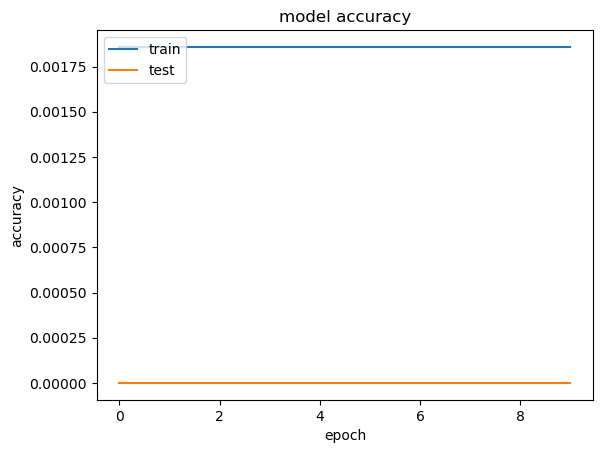

In [109]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

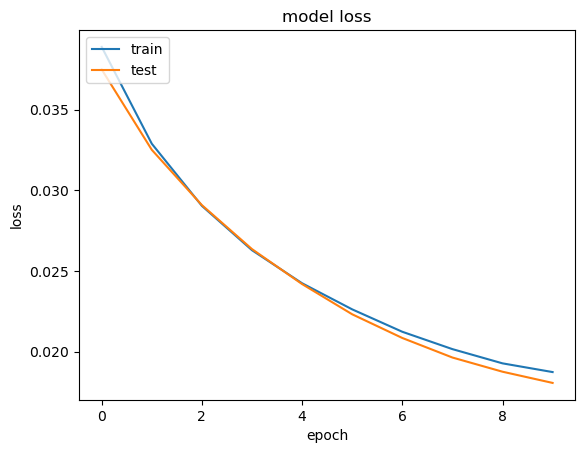

In [110]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show(block=True)

In [111]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_test = (y_test > 0.5).astype(int)

7/7 [==============================] - 0s 3ms/step


In [112]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[140,  21],
       [ 13,  27]], dtype=int64)

In [113]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [114]:
score # 0.830

0.8308457711442786